In [33]:
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
from matplotlib import pyplot as plt

In [19]:
hoyle_data = pd.read_csv("data/hoyle_automated_2021.csv", header=0)
hoyle_data = hoyle_data.drop(columns = [c for c in hoyle_data.columns if c[:2] == "c_"] + ["u_mass_full"])

In [58]:
hoyle_data.head(5).T

,0,1,2,3,4
dataset,wikitext,wikitext,wikitext,wikitext,wikitext
model,mallet,mallet,mallet,mallet,mallet
topic_idx,0,0,0,0,0
human_idx,0,1,2,3,4
scores_raw,2,3,1,3,3
confidences_raw,1,1,1,1,1
task,ratings,ratings,ratings,ratings,ratings


In [20]:
hoyle_data[hoyle_data["task"]=="intrusions"].head(5).T

,4500,4501,4502,4503,4504
dataset,wikitext,wikitext,wikitext,wikitext,wikitext
model,mallet,mallet,mallet,mallet,mallet
topic_idx,0,0,0,0,0
human_idx,0,1,2,3,4
scores_raw,1,1,1,1,1
confidences_raw,1,1,1,1,1
task,intrusions,intrusions,intrusions,intrusions,intrusions


In [23]:
hoyle_data.groupby("topic_idx").agg({"scores_raw":["sum"], "confidences_raw":["sum"]})

,scores_raw,confidences_raw
,sum,sum
topic_idx,,
0,305,212
1,361,204
2,349,226
3,337,228
4,320,217
5,302,240
6,367,239
7,315,227


In [51]:
test = hoyle_data[(hoyle_data["task"]=="intrusions") & (hoyle_data["topic_idx"]==0)]

In [57]:
test[test["human_idx"]==0]

,dataset,model,topic_idx,human_idx,scores_raw,confidences_raw,task
4500,wikitext,mallet,0,0,1,1,intrusions
5800,wikitext,dvae,0,0,0,0,intrusions
7100,wikitext,etm,0,0,0,1,intrusions
8400,nytimes,mallet,0,0,1,1,intrusions
9700,nytimes,dvae,0,0,0,1,intrusions
11000,nytimes,etm,0,0,1,1,intrusions


In [56]:
test.groupby(["human_idx"]).agg({"scores_raw":"sum"})

,scores_raw
human_idx,
0,3
1,5
2,4
3,6
4,4
5,3
6,5
7,3
8,3


In [54]:
test.groupby(["dataset", "model"]).agg({"human_idx":"count"})

human_idx
dataset  model            
nytimes  dvae           26
         etm            26
         mallet         26
wikitext dvae           26
         etm            26
         mallet         26

In [37]:
p_grid = np.linspace(0, 1, 1001)
obs = [0, 1, 1, 0, 0]
prior = np.array([1/1001]*1001)

In [43]:
likelihood = [bernoulli.pmf(ob, p_grid) for ob in obs]

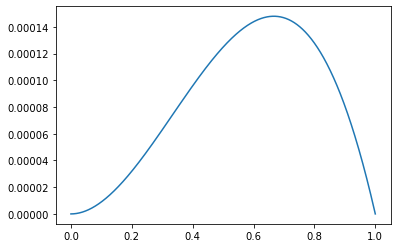

In [46]:
plt.plot(p_grid, prior*likelihood[0]*likelihood[1]*likelihood[2]*)